## Concept of Multicolinearity in Linear Regression

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [3]:
# Read the file named "colinearity.csv" into a Pandas dataframe
df = pd.read_csv('colinearity.csv')


In [4]:
# Take a quick look at the dataset
df.head()


,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


#### Creation of Linear Regression Objects

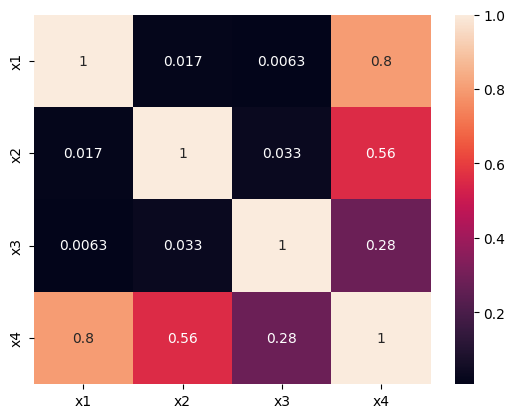

In [5]:
# code to visualize the heatmap of the covariance matrix
corrMatrix = df[['x1','x2','x3','x4']].corr() 
sns.heatmap(corrMatrix, annot=True) 
plt.show()

In [6]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['y'],axis=1)

# Choose the response variable 'y' 
y = df.y.values


In [7]:
### edTest(test_coeff) ###

# Initialize a list to store the beta values for each linear regression model
linear_coef = []

# Loop over all the predictors
# In each loop "i" holds the name of the predictor 
for i in X:
    
    # Set the current predictor as the variable x
    x = df[[i]]

    # Create a linear regression object
    linreg = LinearRegression()

    # Fit the model with training data 
    # Remember to choose only one column at a time i.e. given by x (not X)
    linreg.fit(x,y)
    
    # Add the coefficient value of the model to the list
    linear_coef.append(linreg.coef_)


### Multi-Linear Regression using all variables

In [8]:
### edTest(test_multi_coeff) ###

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X,y)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_


#### Printing the individual $\beta$ values

In [9]:
# Helper code to see the beta values of the linear regression models

print('By simple(one variable) linear regression for each variable:', sep = '\n')

for i in range(4):
    pprint(f'Value of beta{i+1} = {linear_coef[i][0]:.2f}')


By simple(one variable) linear regression for each variable:
'Value of beta1 = 34.73'
'Value of beta2 = 68.63'
'Value of beta3 = 59.40'
'Value of beta4 = 20.92'


In [10]:
# Helper code to compare with the values from the multi-linear regression
print('By multi-Linear regression on all variables')
for i in range(4):
    pprint(f'Value of beta{i+1} = {round(multi_coef[i],2)}')
    

By multi-Linear regression on all variables
'Value of beta1 = -24.61'
'Value of beta2 = 27.72'
'Value of beta3 = 37.67'
'Value of beta4 = 19.27'


⏸ the $\beta$ values are different in the two cases?


####  Because of collinearity between $\beta_1$ and $\beta_4$

